In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 

In [0]:
dataset= keras.datasets.mnist

In [0]:
digit_dataset=dataset.load_data()

In [0]:
type(digit_dataset)

tuple

In [0]:
(train_image,train_output),(test_image,test_output)=digit_dataset

In [0]:
len(test_image)

10000

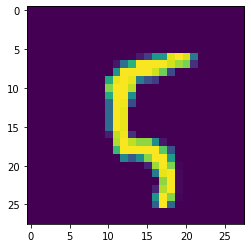

In [0]:
plt.imshow(train_image[100])


In [0]:
train_image.shape

(60000, 28, 28)

In [0]:
model=keras.Sequential([
                        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                        keras.layers.MaxPool2D(2,2),
                        keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                        keras.layers.MaxPool2D(2,2),
                        keras.layers.Flatten(),
                        keras.layers.Dense(512,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')
                                                
])

In [0]:
train_image=train_image.reshape(60000,28,28,1)
train_image=train_image/255.0
test_image=test_image.reshape(10000,28,28,1)
test_image=test_image/255.0

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               819712    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [0]:
model.fit(train_image,train_output,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1103 - accuracy: 0.9664
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0367 - accuracy: 0.9889
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0257 - accuracy: 0.9915
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0170 - accuracy: 0.9944
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0142 - accuracy: 0.9952
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0109 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0091 - accuracy: 0.9970
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0069 - accuracy: 0.9975
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0060 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.005

In [0]:
test_loss,acc=model.evaluate(test_image,test_output)

313/313 [==============================] - 1s 2ms/step - loss: 0.0481 - accuracy: 0.9912


In [0]:
print("Accuracy on test data {:.2f}%".format(acc*100))

Accuracy on test data 99.12%


In [0]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_image)

In [0]:
count=0
for i in range(len(test_image)):
  if np.argmax(predictions[i])!=test_output[i]:
    count=count+1

print("total matched {} and not matched {}".format(len(test_image)-count,count))  
print("Accuracy on test data {:.2f}%".format(acc*100)) 

total matched 9912 and not matched 88
Accuracy on test data 99.12%
